Step1: Import Relevant Libraries and Dataset

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset

In [263]:
data=pd.read_csv('/content/customer_churn.csv')

Step2: Understanding The Dataset

In [264]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [265]:
# how many rows and cols are present in customer_churn data set? ==> shape
data.shape
print("Number of rows: ", data.shape[0])
print("Number of columns: ", data.shape[1])

data.shape

Number of rows:  7043
Number of columns:  21


(7043, 21)

In [266]:
#what are the names of col?
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [267]:
# check out the first few and last few rows.
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [268]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0.0,No,No,66.0,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [269]:
# what are the dtypes of the columns? Identify the numerical and categorical columns
data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,float64
Partner,object
Dependents,object
tenure,float64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [270]:
#what is the genaral info regarding the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7036 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7030 non-null   float64
 6   PhoneService      7030 non-null   object 
 7   MultipleLines     7030 non-null   object 
 8   InternetService   7006 non-null   object 
 9   OnlineSecurity    7028 non-null   object 
 10  OnlineBackup      7028 non-null   object 
 11  DeviceProtection  7028 non-null   object 
 12  TechSupport       7028 non-null   object 
 13  StreamingTV       7021 non-null   object 
 14  StreamingMovies   7029 non-null   object 
 15  Contract          7018 non-null   object 
 16  PaperlessBilling  7029 non-null   object 


In [271]:
#what are the statistics of the numeric columns
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7036.000000,7030.000000,7027.000000
mean,0.162024,32.367568,64.757855
std,0.368499,24.560644,30.091845
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [272]:
#what are the statistics of the catrgorical columns
data.describe(include=['object'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7030,7030,7006,7028,7028,7028,7028,7021,7029,7018,7029,7042,7036,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6526,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6349,3382,3081,3492,3083,3090,3466,2802,2780,3860,4165,2365,11,5174


In [273]:
# checking for null values
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,7
Partner,0
Dependents,0
tenure,13
PhoneService,13
MultipleLines,13
InternetService,37
OnlineSecurity,15


In [274]:
# Get number of unique values in each column - helps identify categorical and continuous variables.
data.nunique()


,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


<Axes: >

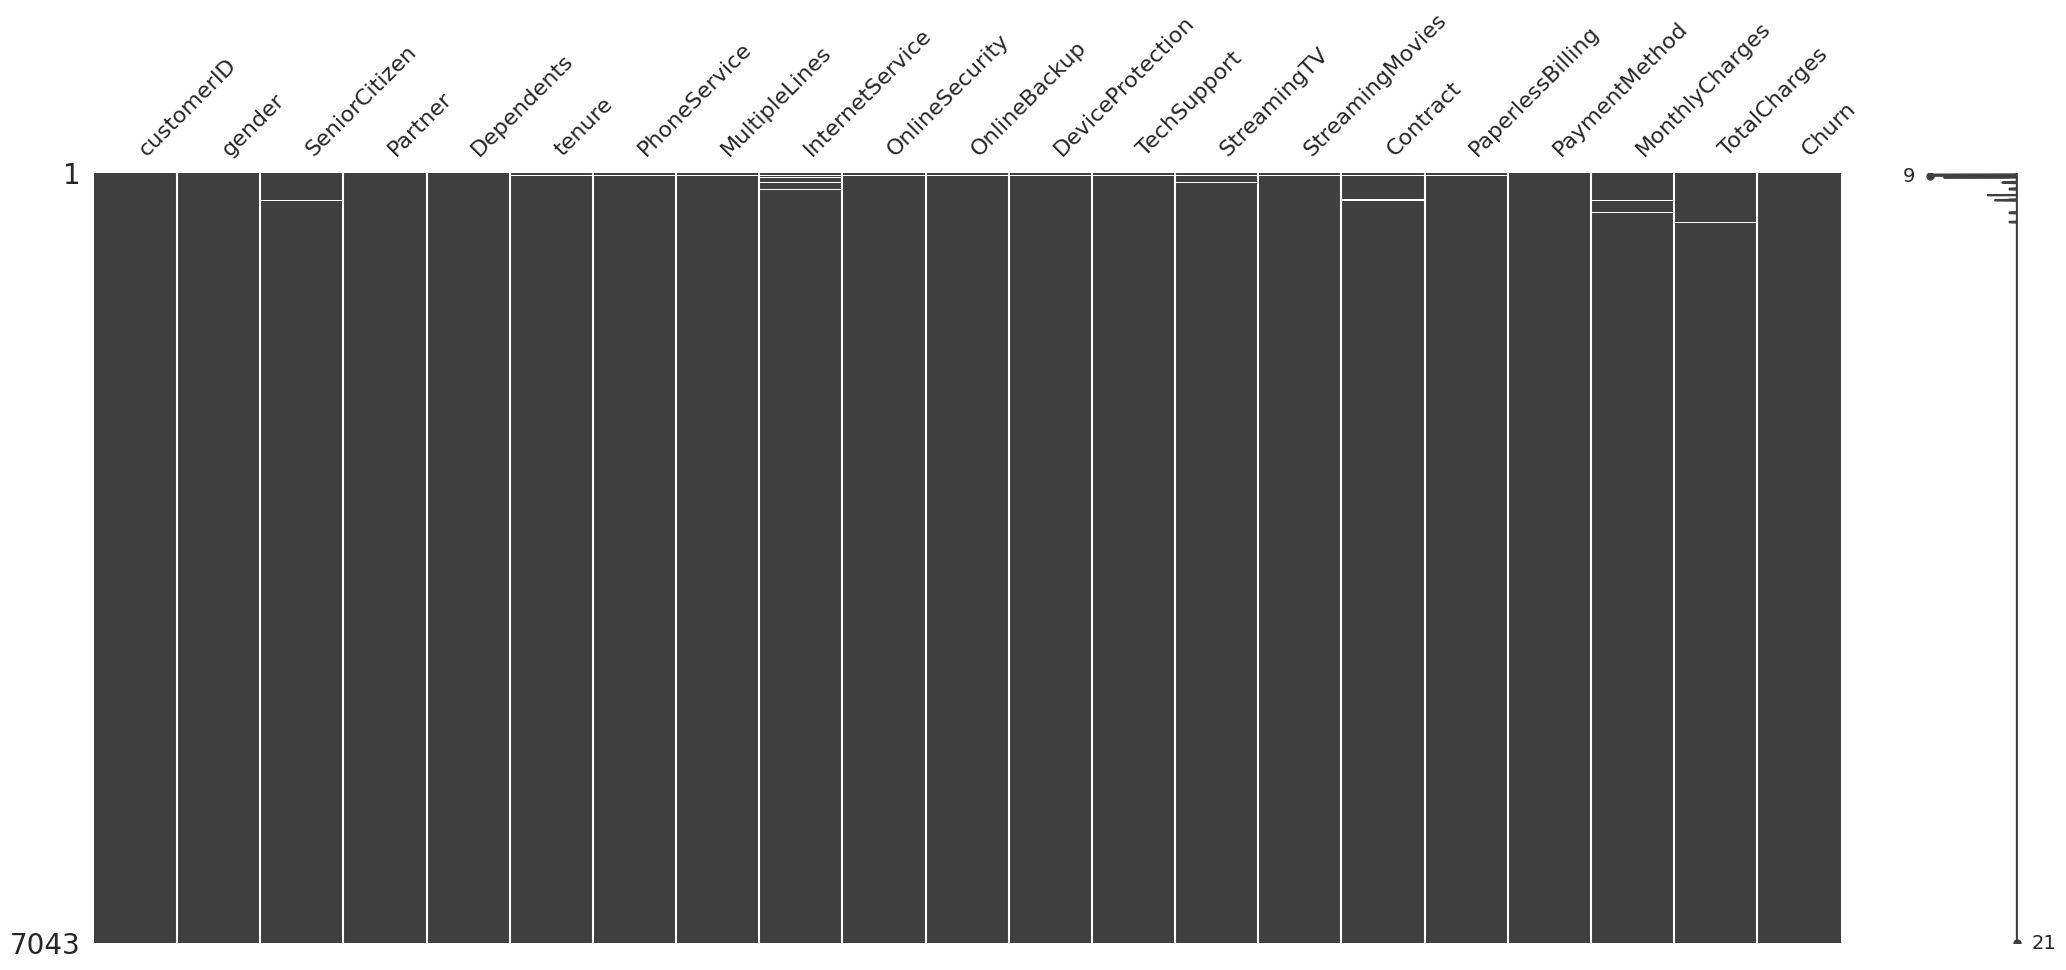

In [275]:
import missingno as msno
msno.matrix(data)

Handling missing values
treat missing values

remove rows/col with missing value (>50% is missing)

Fill the missing values with a particular value:

mean (numeric col)

median (to fill numeric column which are right skewed)

mode (to fill categorical column)

In [276]:
# numerical coluns---SeniorCitizen	tenure	MonthlyCharges---float
# categorical columns- customerID	gender	Partner	Dependents	PhoneService	MultipleLines	InternetService
                     #	OnlineSecurity	OnlineBackup	DeviceProtection	TechSupport	StreamingTV	StreamingMovies
                     #Contract	PaperlessBilling	PaymentMethod	TotalCharges	Churn

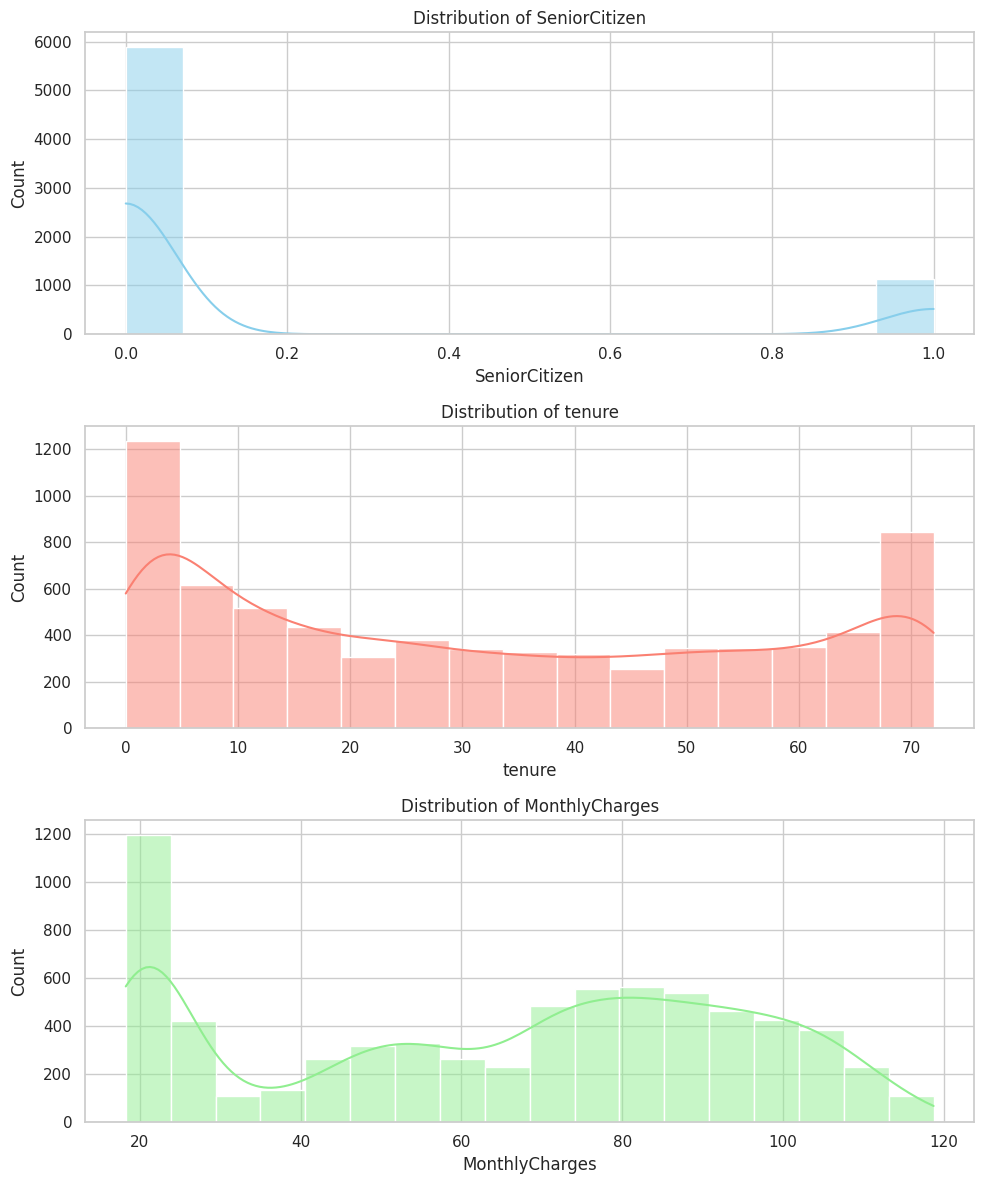

In [277]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Plot distribution of SeniorCitizen
sns.histplot(data['SeniorCitizen'].dropna(), kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of SeniorCitizen')

# Plot distribution of tenure
sns.histplot(data['tenure'].dropna(), kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of tenure')


# Plot distribution of MonthlyCharges
sns.histplot(data['MonthlyCharges'].dropna(), kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Distribution of MonthlyCharges')

# Adjust layout
plt.tight_layout()
plt.show()

In [278]:
# SeniorCitizen	7-numerical---skewed--median
data.fillna({'SeniorCitizen': data['SeniorCitizen'].median()},inplace=True)

In [279]:
# tenure	13 numerical---skewed--median
data.fillna({'tenure': data['tenure'].median()},inplace=True)

In [280]:
# MonthlyCharges-16 numerical---skewed--median
data.fillna({'MonthlyCharges': data['MonthlyCharges'].median()},inplace=True)

In [281]:
# PhoneService	13 -categorical---mode (to fill categorical column)
data.fillna({'PhoneService':data['PhoneService'].mode()[0]},inplace=True)


In [282]:
# MultipleLines 13 ---mode (to fill categorical column)
data.fillna({'MultipleLines':data['MultipleLines'].mode()[0]},inplace=True)

In [283]:
# InternetService 37 ---mode (to fill categorical column)
data.fillna({'InternetService':data['InternetService'].mode()[0]},inplace=True)

In [284]:
# OnlineSecurity 15 --mode (to fill categorical column)
data.fillna({'OnlineSecurity':data['OnlineSecurity'].mode()[0]},inplace=True)

In [285]:
# OnlineBackup 15 --mode (to fill categorical column)
data.fillna({'OnlineBackup':data['OnlineBackup'].mode()[0]},inplace=True)

In [286]:
# DeviceProtection 15----mode (to fill categorical column)
data.fillna({'DeviceProtection':data['DeviceProtection'].mode()[0]},inplace=True)

In [287]:
# TechSupport 15 --mode (to fill categorical column)
data.fillna({'TechSupport':data['TechSupport'].mode()[0]},inplace=True)

In [288]:
# StreamingTV 22 --mode (to fill categorical column)
data.fillna({'StreamingTV':data['StreamingTV'].mode()[0]},inplace=True)

In [289]:
# StreamingMovies 14 -mode (to fill categorical column)
data.fillna({'StreamingMovies':data['StreamingMovies'].mode()[0]},inplace=True)

In [290]:
# Contract 25 ---mode (to fill categorical column)
data.fillna({'Contract':data['Contract'].mode()[0]},inplace=True)

In [291]:
# PaperlessBilling 14----mode (to fill categorical column)
data.fillna({'PaperlessBilling':data['PaperlessBilling'].mode()[0]},inplace=True)

In [292]:
# PaymentMethod 1---mode (to fill categorical column)
data.fillna({'PaymentMethod':data['PaymentMethod'].mode()[0]},inplace=True)

In [293]:
# MonthlyCharges 16---mode (to fill categorical column)
data.fillna({'MonthlyCharges':data['MonthlyCharges'].mode()[0]},inplace=True)

In [294]:
# TotalCharges 7----mode (to fill categorical column)
data.fillna({'TotalCharges':data['TotalCharges'].mode()[0]},inplace=True)

In [295]:
# to chech missing values
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [296]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [297]:
data.shape

(7043, 21)

In [298]:
data.drop(columns = ['customerID'], inplace = True)

In [299]:
data.shape

(7043, 20)

In [300]:
#data.drop(columns = ['tenure'], inplace = True)

In [301]:
data.shape

(7043, 20)

Step3: Data visualizatiom

In [302]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors = 'coerce')
data.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [303]:
# histograms of all numerical columns
num_col=data.select_dtypes(include=['float64']).columns

In [304]:
num_col

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

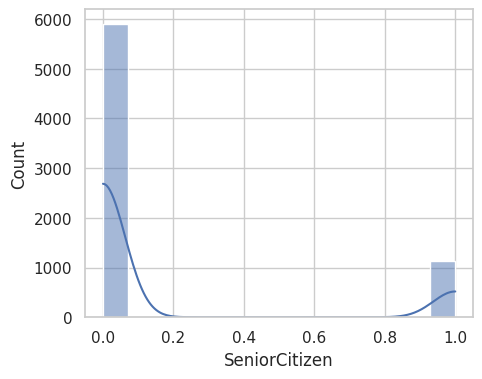

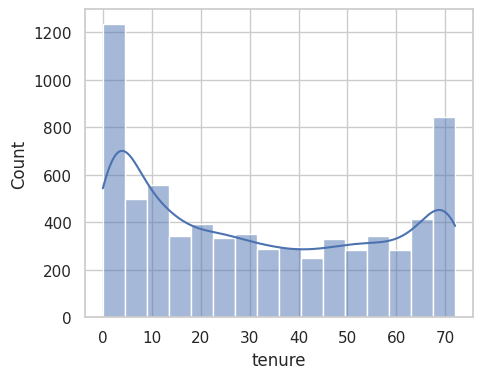

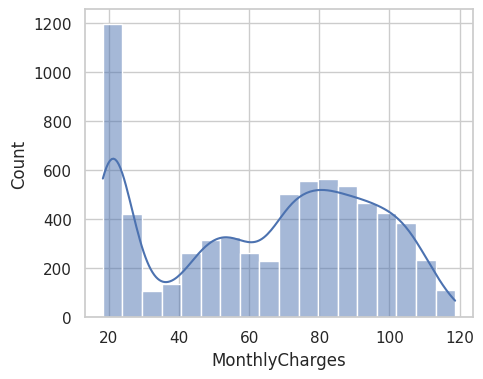

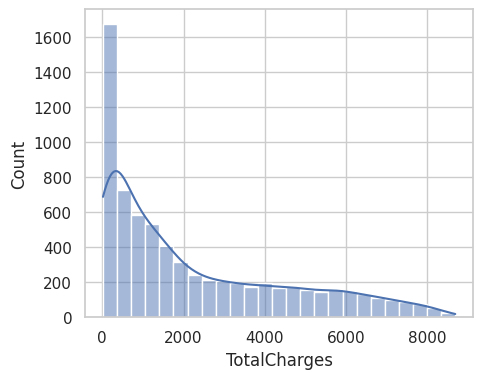

In [305]:
#Univariate analysis
#histogram for all numerical columns

num_cols = data.select_dtypes(include=[ 'float64']).columns
for col in num_cols:
    plt.figure(figsize=(5, 4))
    sns.histplot(data[col], kde=True)

In [306]:
categorical_cols = data.select_dtypes(include='object').columns

In [307]:
categorical_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

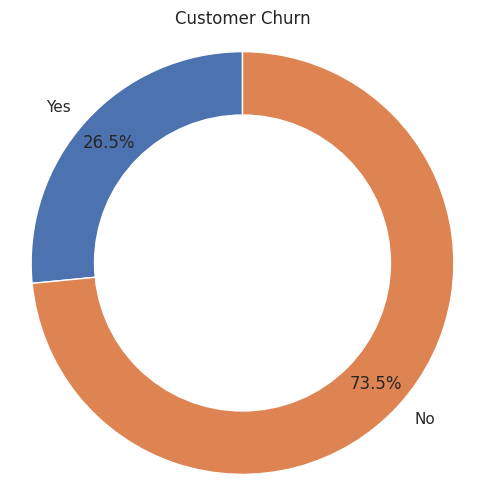

In [308]:
# Sample data (replace with your DataFrame)
data1 = {
    "Churn": ["Yes", "No"],
    "Count": [data["Churn"].value_counts()["Yes"], data["Churn"].value_counts()["No"]]
}

# Create a DataFrame from the sample data
churn_df = pd.DataFrame(data1)

# Create a pie chart using Seaborn and Matplotlib
plt.figure(figsize=(6, 6))
sns.set_palette("pastel")
sns.set(style="whitegrid")

plt.pie(churn_df["Count"], labels=churn_df["Churn"], autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title("Customer Churn")

# Draw a circle in the center to make it look like a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

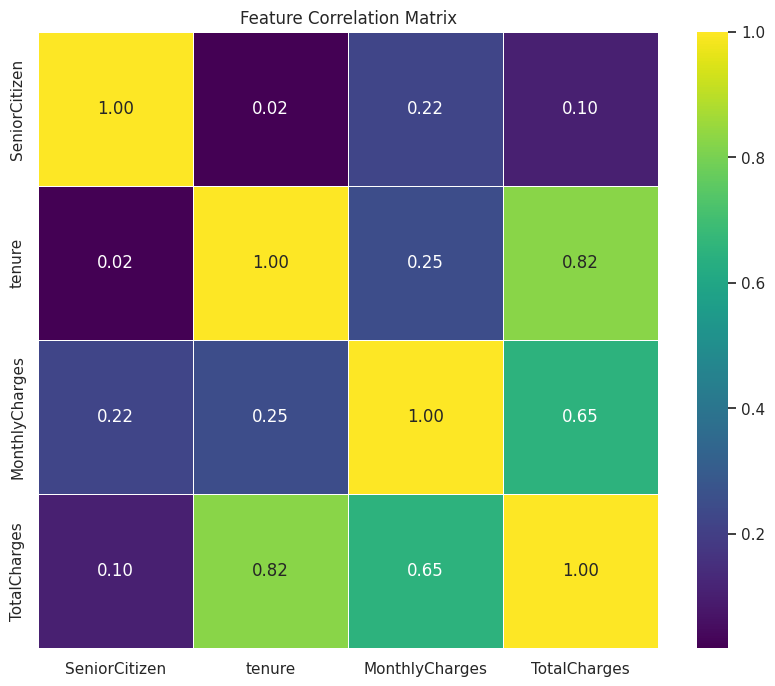

In [309]:
correlation = data[num_col].corr()

plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)

# Set the title
plt.title("Feature Correlation Matrix")

# Show the plot
plt.show()

In [310]:
data["Churn"][data["Churn"]=="Yes"].groupby(by=data["SeniorCitizen"]).count()


,Churn
SeniorCitizen,
0.0,1395
1.0,474


In [311]:
data["Churn"][data["Churn"]=="No"].groupby(by=data["SeniorCitizen"]).count()

,Churn
SeniorCitizen,
0.0,4508
1.0,666


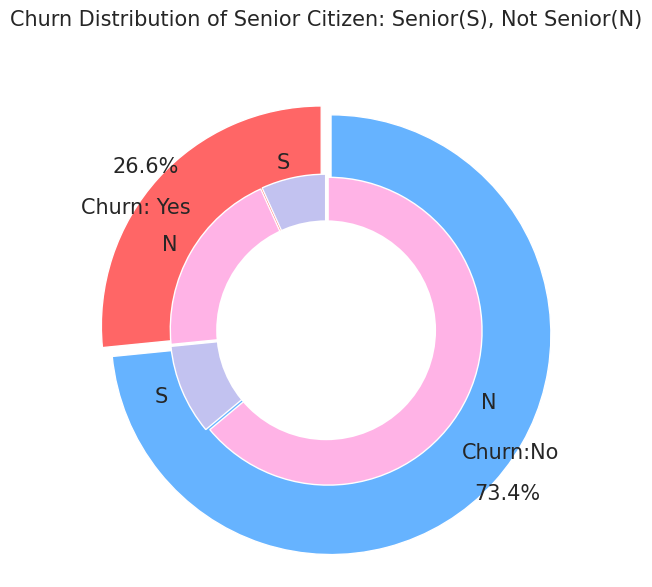

In [313]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["S","N","S","N"]
sizes_gender = [476,1393,666,4497]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution of Senior Citizen: Senior(S), Not Senior(N)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()


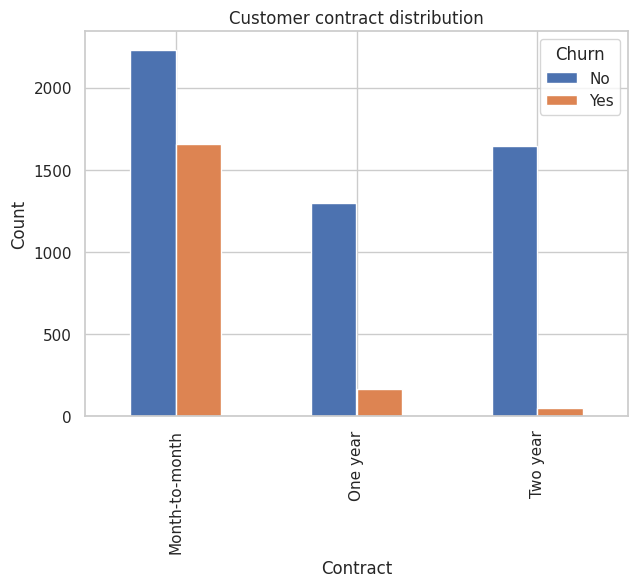

In [314]:
fig, ax = plt.subplots(figsize=(7, 5))

# Group data by Contract and Churn
grouped_data = data.groupby(['Contract', 'Churn']).size().unstack()

# Plot the histogram
grouped_data.plot(kind='bar', stacked=False, ax=ax)
ax.set_xlabel('Contract')
ax.set_ylabel('Count')
ax.set_title('Customer contract distribution')
ax.legend(title='Churn')

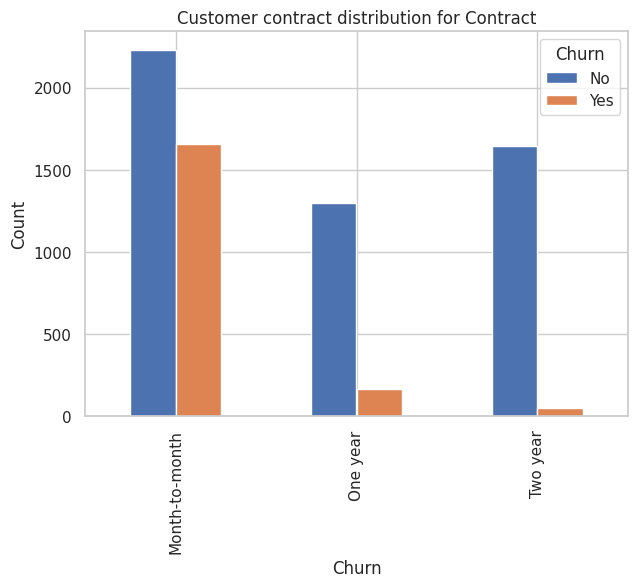

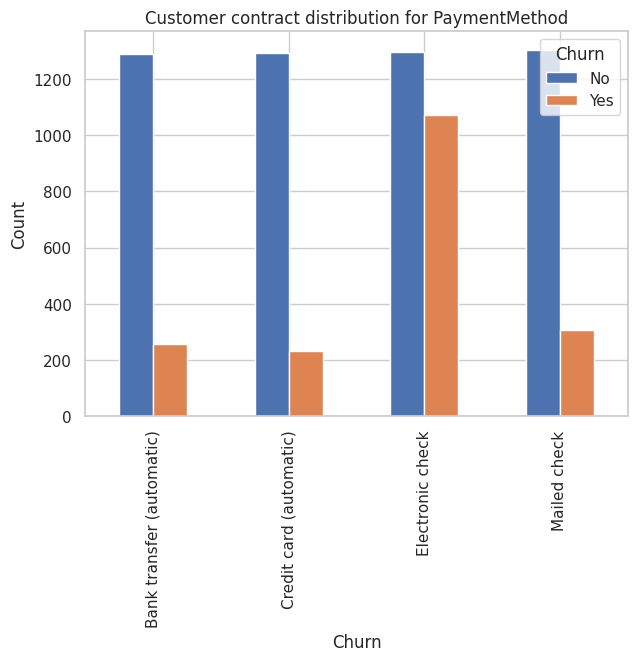

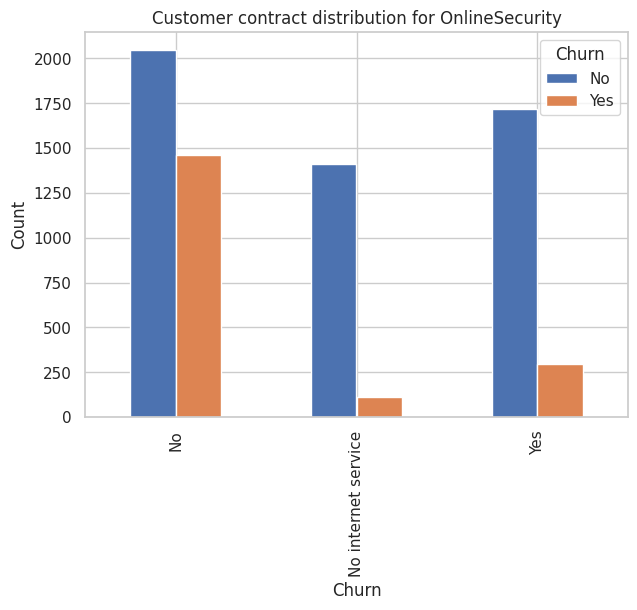

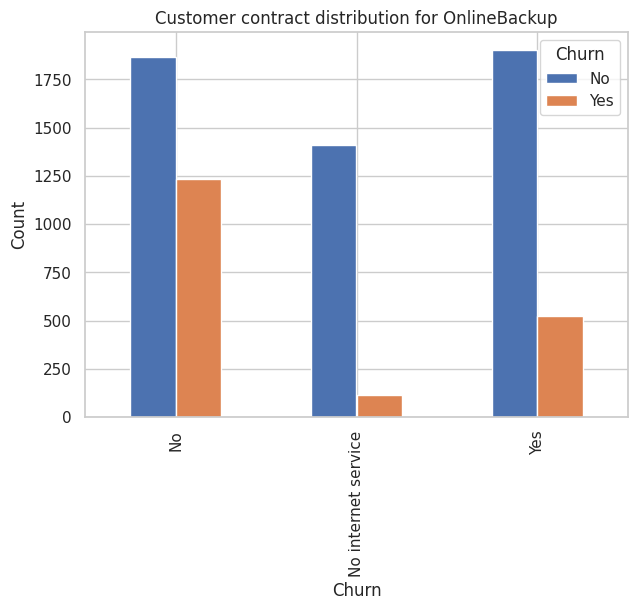

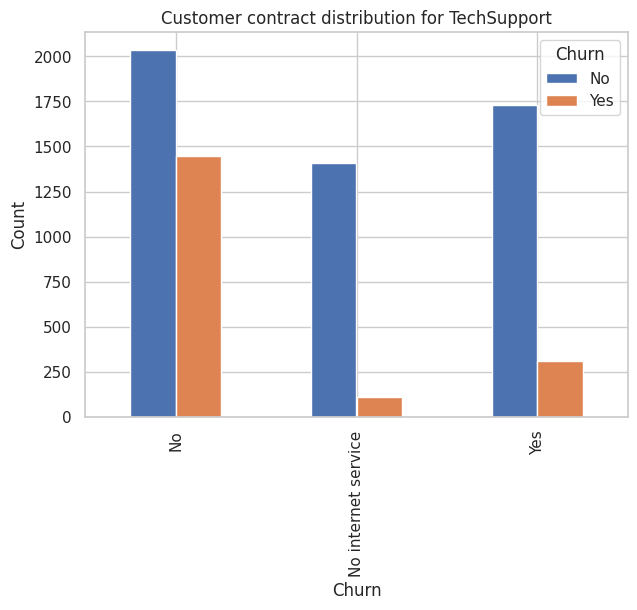

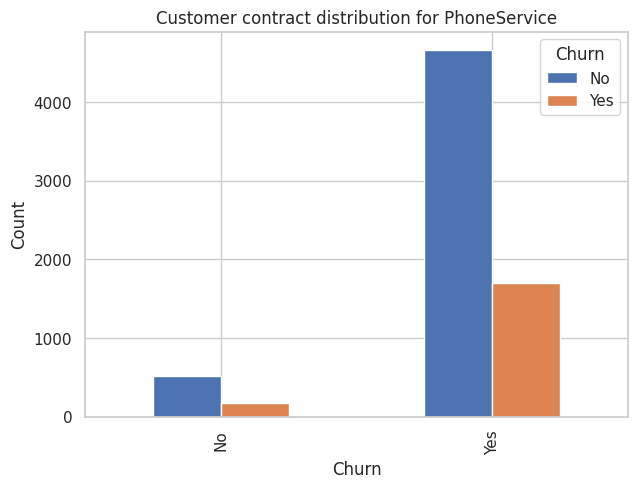

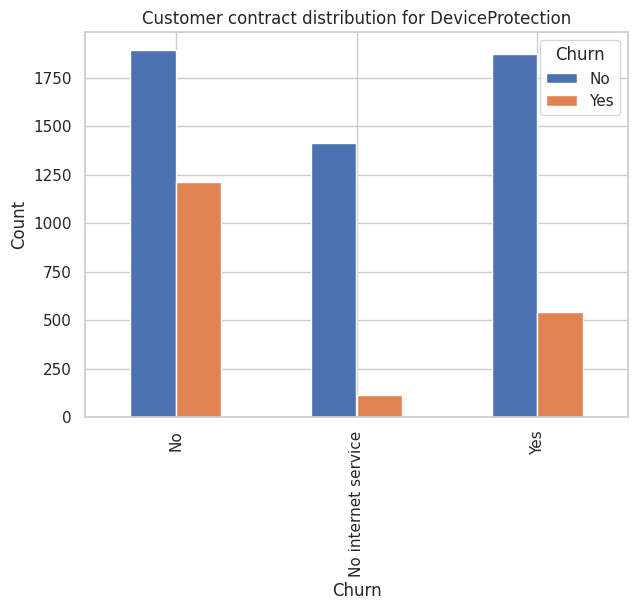

In [315]:
# List of values to replace 'Contract' in each plot
contract_values = ['Contract', 'PaymentMethod', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'PhoneService', 'DeviceProtection']  # Replace with your values

# Create a subplot for each contract value
for contract_value in contract_values:
    fig, ax = plt.subplots(figsize=(7, 5))

    # Group data by Churn for the current contract value
    grouped_data = data.groupby([contract_value, 'Churn']).size().unstack()

    # Plot the histogram
    grouped_data.plot(kind='bar', stacked=False, ax=ax)
    ax.set_xlabel('Churn')
    ax.set_ylabel('Count')
    ax.set_title(f'Customer contract distribution for {contract_value}')
    ax.legend(title='Churn')

plt.show()  # Show all the plots

In [316]:
data.nunique()

,0
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3


In [317]:
# Convert Categorical to Numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [318]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [319]:
data['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [320]:
data['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [321]:
data['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [322]:
cols_to_encode = [col for col in data.columns if data[col].nunique()>1 and data[col].nunique()<5]

In [323]:
cols_to_encode


['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [324]:
data['SeniorCitizen'].unique()

array([0., 1.])

In [325]:
cols_to_encode.remove('SeniorCitizen')

In [326]:
for col in cols_to_encode:
  data[col] = le.fit_transform(data[col])

In [327]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0.0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0.0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0.0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0.0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0.0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [328]:
# Convert 'TotalCharges' column to numeric, handling errors
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Replace empty strings or spaces with NaN in the entire DataFrame
data = data.replace(r'^\s*$', np.nan, regex=True)

# Impute missing values in 'TotalCharges' using the median
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

<ipython-input-328-a288ccb481fd>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [329]:
X = data.drop(columns = ['Churn'])
y = data['Churn'].values


In [330]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 42)

<ipython-input-331-7175a2573cd1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(frame[feature], color= color)
<ipython-input-331-7175a2573cd1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(frame[feature], color= color)


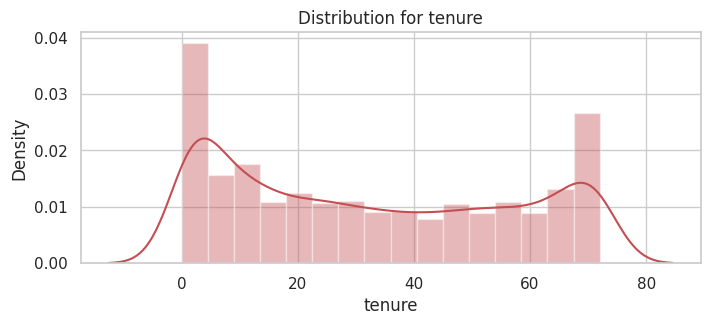

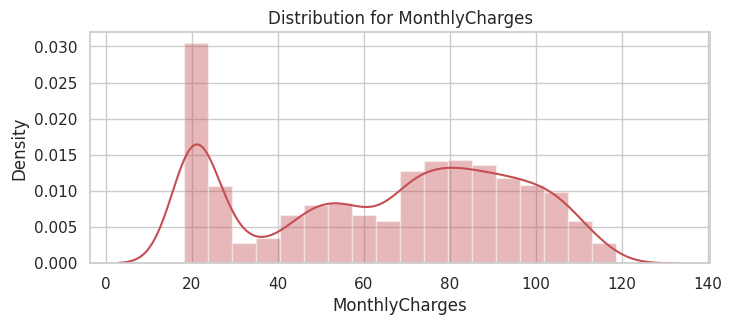

In [331]:
from plotly.subplots import make_subplots
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

num_cols = ["tenure", 'MonthlyCharges']
for feat in num_cols: distplot(feat, data)


In [332]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

<ipython-input-331-7175a2573cd1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(frame[feature], color= color)
<ipython-input-331-7175a2573cd1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(frame[feature], color= color)
<ipython-input-331-7175a2573cd1>:5: UserWarning: 

`distplot` 

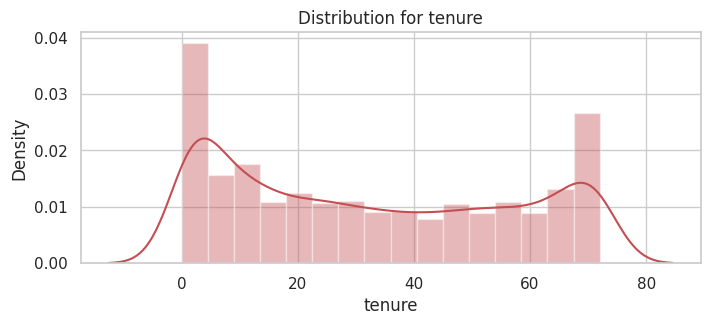

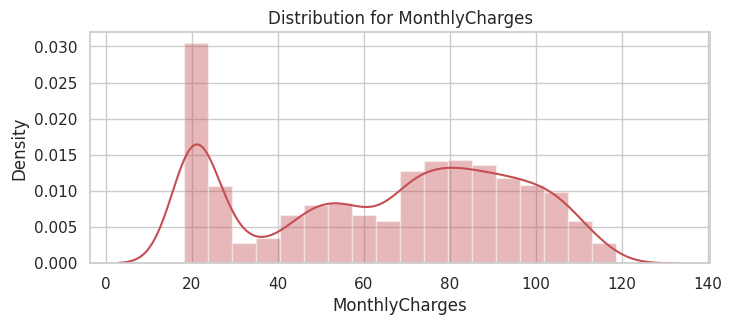

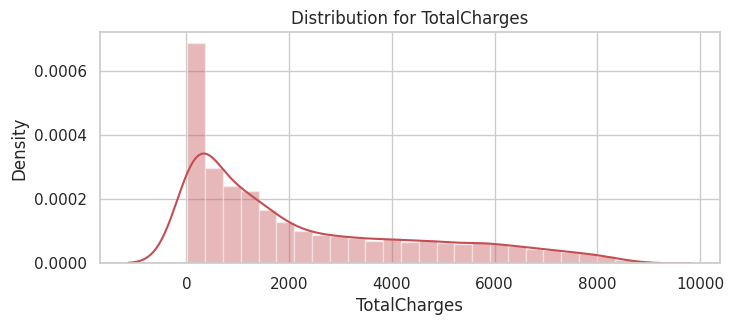

In [333]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, data)

In [335]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve


In [336]:
model_rf = RandomForestClassifier(n_estimators=100 , oob_score = True, n_jobs = -1,
                                  random_state =40, max_features = "sqrt",
                                  max_leaf_nodes = 60)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))


0.8012304779933743


In [337]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1539
           1       0.69      0.48      0.57       574

    accuracy                           0.80      2113
   macro avg       0.76      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



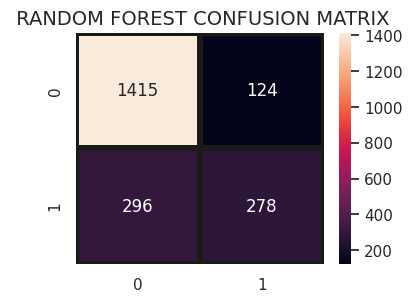

In [338]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()


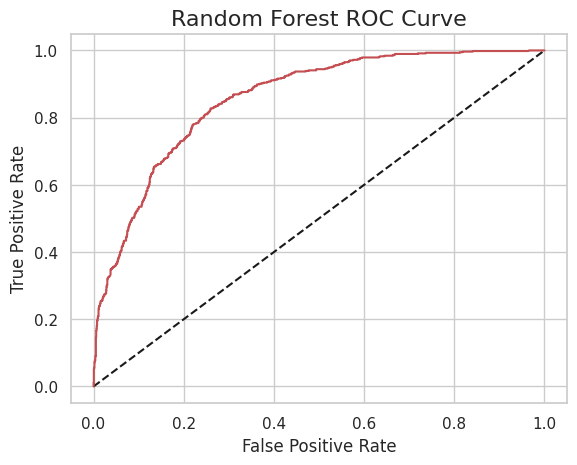

In [339]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

In [340]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", metrics.accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.7974443918599148


In [341]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1539
           1       0.66      0.52      0.58       574

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



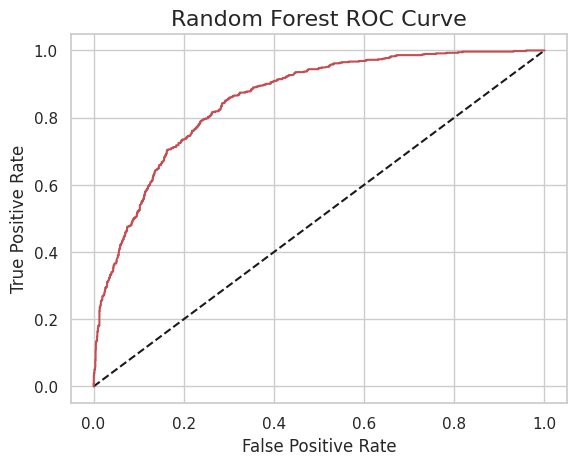

In [342]:
y_rfpred_prob = gb.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();
